### Importing all requirements for model training

In [96]:
import tensorflow as tf
from tensorflow.keras import preprocessing
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
import matplotlib.image as mpimg
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import os
import numpy as np

buildings


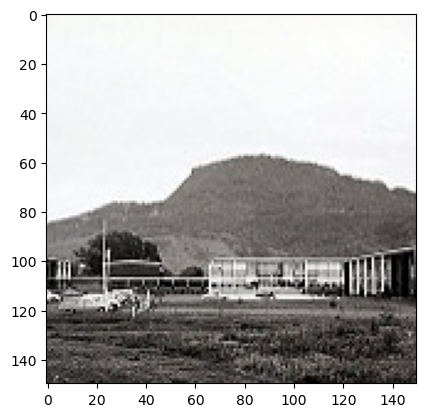

forest


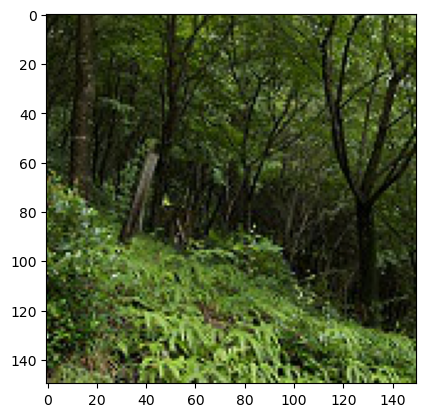

glacier


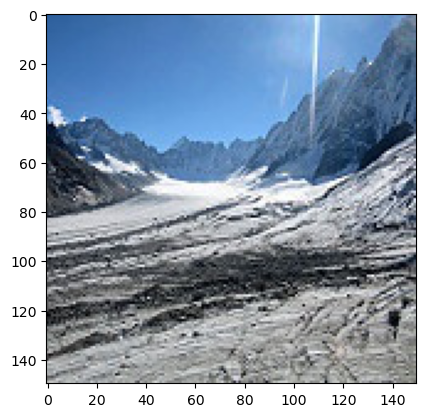

mountain


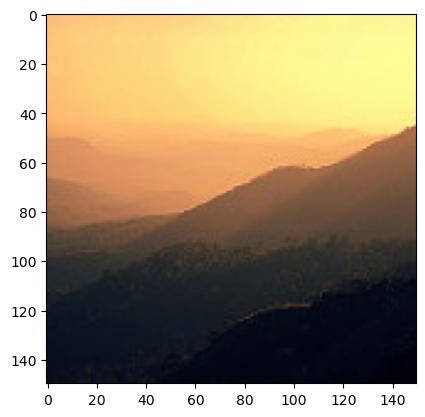

sea


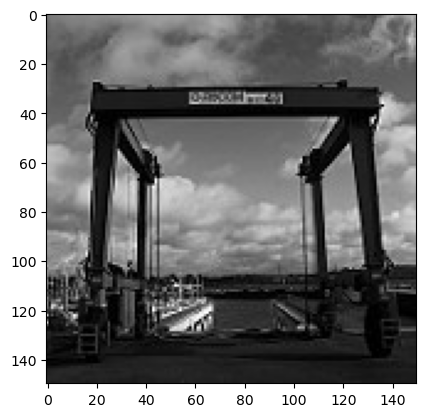

street


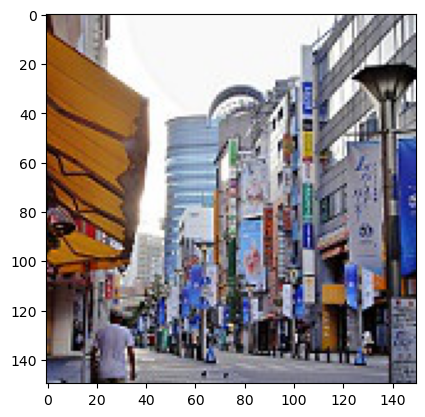

In [77]:
%matplotlib inline
trainpics = "train"

for i in os.listdir(trainpics):
    count=0
    print(i)
    for j in os.listdir('train/'+i):
        img = mpimg.imread('train/'+i+"/"+j)
        imgplot = plt.imshow(img)
        plt.show()
      

        break

     


#### Loading tarining data using the Keras ImageDataGenerator for preprocessing

In [31]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    directory='train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training')

Found 11230 images belonging to 6 classes.


In [39]:
for i in train_generator:
    print(i)
    break

(array([[[[0.2509804 , 0.28627452, 0.32156864],
         [0.2784314 , 0.3137255 , 0.34901962],
         [0.30980393, 0.3372549 , 0.36862746],
         ...,
         [0.04705883, 0.08235294, 0.10980393],
         [0.02745098, 0.0627451 , 0.09019608],
         [0.00392157, 0.03921569, 0.06666667]],

        [[0.34509805, 0.3803922 , 0.40784317],
         [0.34117648, 0.36862746, 0.40000004],
         [0.3647059 , 0.3921569 , 0.4156863 ],
         ...,
         [0.0509804 , 0.08627451, 0.1137255 ],
         [0.02745098, 0.0627451 , 0.09019608],
         [0.01568628, 0.04313726, 0.07450981]],

        [[0.37647063, 0.4039216 , 0.427451  ],
         [0.35686275, 0.38431376, 0.40784317],
         [0.36862746, 0.38823533, 0.4039216 ],
         ...,
         [0.01960784, 0.04705883, 0.07843138],
         [0.00784314, 0.03529412, 0.05882353],
         [0.00784314, 0.03529412, 0.05882353]],

        ...,

        [[0.08235294, 0.11764707, 0.15294118],
         [0.08627451, 0.12156864, 0.15686275

### Loading validation data using the Keras ImageDataGenerator for preprocessing 
note used test data as they not given validatin data

In [32]:
validation_generator = train_datagen.flow_from_directory(
    directory='test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 598 images belonging to 6 classes.


#### Create a CNN model for training 

In [34]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

#### compiling the model and fitting the model for training using train data with 11 epochs

In [35]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_generator, epochs=11, validation_data=validation_generator)

Epoch 1/11
351/351 [==============================] - 85s 240ms/step - loss: 1.1682 - accuracy: 0.5515 - val_loss: 0.9596 - val_accuracy: 0.6455
Epoch 2/11
351/351 [==============================] - 84s 240ms/step - loss: 0.8566 - accuracy: 0.6822 - val_loss: 0.7604 - val_accuracy: 0.7358
Epoch 3/11
351/351 [==============================] - 85s 241ms/step - loss: 0.6983 - accuracy: 0.7503 - val_loss: 0.7705 - val_accuracy: 0.7291
Epoch 4/11
351/351 [==============================] - 84s 240ms/step - loss: 0.5792 - accuracy: 0.7874 - val_loss: 0.6915 - val_accuracy: 0.7642
Epoch 5/11
351/351 [==============================] - 86s 244ms/step - loss: 0.4821 - accuracy: 0.8232 - val_loss: 0.7042 - val_accuracy: 0.7609
Epoch 6/11
351/351 [==============================] - 85s 243ms/step - loss: 0.3980 - accuracy: 0.8570 - val_loss: 0.6560 - val_accuracy: 0.7726
Epoch 7/11
351/351 [==============================] - 84s 240ms/step - loss: 0.3281 - accuracy: 0.8827 - val_loss: 0.7494 - val_ac

In [83]:
# Save the trained model
model.save('final_model_ml.h5')

In [84]:
model = load_model('final_model_ml.h5')

In [85]:
test_generator = train_datagen.flow_from_directory(
    directory='test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 598 images belonging to 6 classes.


In [86]:
test_loss, test_accuracy = model.evaluate(test_generator)

# Print the test accuracy
print('Test accuracy:', test_accuracy)

19/19 [==============================] - 1s 43ms/step - loss: 1.0759 - accuracy: 0.7659
Test accuracy: 0.7658863067626953


In [87]:

train_loss, train_accuracy = model.evaluate(train_generator)

# Print the test accuracy
print('Train accuracy:', train_accuracy)

351/351 [==============================] - 16s 45ms/step - loss: 0.0476 - accuracy: 0.9878
Train accuracy: 0.9878005385398865


### prediction 

In [106]:
classes = []
for i in os.listdir('train'):
    classes.append(i)
classes

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

### predicted for 4 images given
#### note : if want to predict all images then remove count and if statement

1/1 [==============================] - 0s 18ms/step


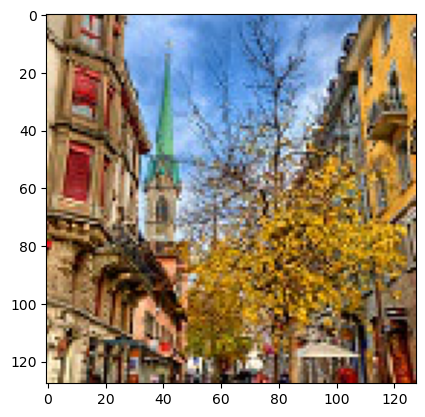

street
1/1 [==============================] - 0s 17ms/step


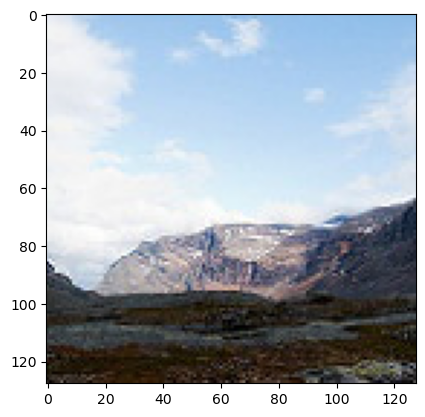

mountain
1/1 [==============================] - 0s 15ms/step


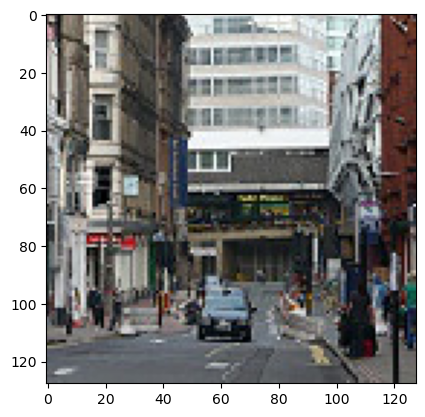

street
1/1 [==============================] - 0s 15ms/step


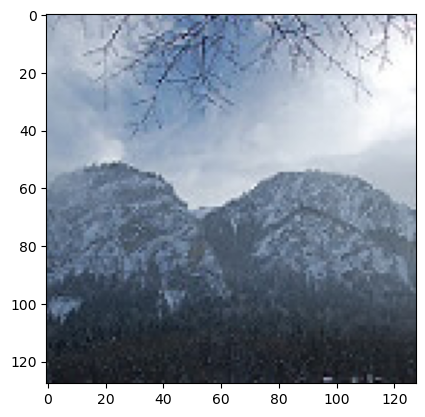

mountain


In [112]:
from tensorflow.keras.preprocessing import image
count =0
for i in os.listdir('predict'):
    img = image.load_img("predict/"+i ,target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    prediction = model.predict(img_array)
    predicted_class = classes[np.argmax(prediction[0])]
    imgplot = plt.imshow(img)
    plt.show()
    print(predicted_class)
    count+=1
    if count==4:
        break